# Objectif

Prédire les chances d'admission d'étudiants (y compris entre 0 et 1) en fonction de paramètres (GRE Scores GRE (sur 340), score TOEFL (sur 120), note en université (sur 5), force de la déclaration d'intention (sur 5) et  force de la lettre de recommandation (sur 5), GPA, Experience en recherche (0 ou 1)

# Chargement des données 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data0 = pd.read_csv("./Admission_Predict.csv", sep=',')
# realtest= pd.read_csv("./Admission_Predict_Ver1.1.csv", sep=',')


# Observation des données

In [2]:
print(type(data0))     
data0.head()
data=data0.rename(columns={"Serial No.": "No", "GRE Score": "GRE", "TOEFL Score":"TOEFL", "University Rating": "Univ", "Chance of Admit ": "Chance_Admit"})
data.head()

<class 'pandas.core.frame.DataFrame'>


,No,GRE,TOEFL,Univ,SOP,LOR,CGPA,Research,Chance_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,No,GRE,TOEFL,Univ,SOP,LOR,CGPA,Research,Chance_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
#on passe toutes les variables en float, pour faire une régression linéaire multivariée par la suite 
print(data.shape)
for i in data.columns:
    data[i]=data[i].astype(np.float64)
data.info()

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            400 non-null    float64
 1   GRE           400 non-null    float64
 2   TOEFL         400 non-null    float64
 3   Univ          400 non-null    float64
 4   SOP           400 non-null    float64
 5   LOR           400 non-null    float64
 6   CGPA          400 non-null    float64
 7   Research      400 non-null    float64
 8   Chance_Admit  400 non-null    float64
dtypes: float64(9)
memory usage: 28.2 KB


In [5]:
#Nombre de valeurs manquantes
print("donnees manquantes dans le train set:", data.isnull().sum())

donnees manquantes dans le train set: No              0
GRE             0
TOEFL           0
Univ            0
SOP             0
LOR             0
CGPA            0
Research        0
Chance_Admit    0
dtype: int64


Il n'y a pas de valeurs manquantes dans le training set. 

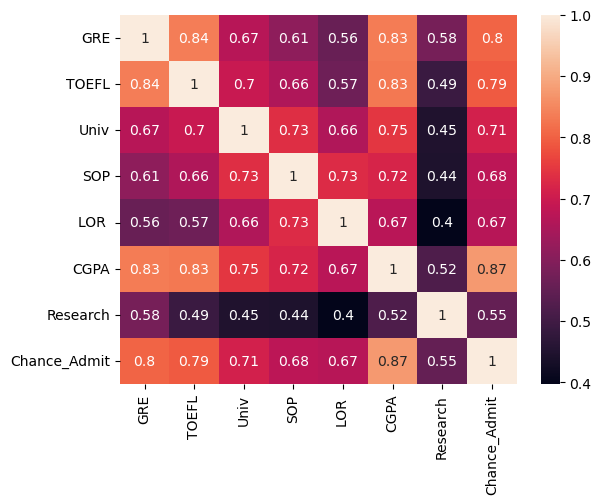

In [6]:
data2=data.drop(columns=["No"])
corr_matrix=data2.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
Y_train=data.pop("Chance_Admit")
#print(Y_train[0:2])

X_train=data.drop(columns=["No"])
print(type(X_train))
print(X_train[0:2])

<class 'pandas.core.frame.DataFrame'>
     GRE  TOEFL  Univ  SOP  LOR   CGPA  Research
0  337.0  118.0   4.0  4.5   4.5  9.65       1.0
1  324.0  107.0   4.0  4.0   4.5  8.87       1.0


On split les données de training en training set et validation set

In [8]:
from sklearn.model_selection import train_test_split
X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=0)
print("taille des sets", X_train_split.shape, Y_train_split.shape, X_val.shape, Y_val.shape)

taille des sets (268, 7) (268,) (132, 7) (132,)


# Tests de modèles de régression et performances

## Régression pénalisée Elastic Net

coefficients: [0.0064675 0.        0.        0.        0.        0.        0.       ]
intercept: -1.3224272970966244
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
R2: 0.5187928215292901
Mean Absolute Error: 0.073


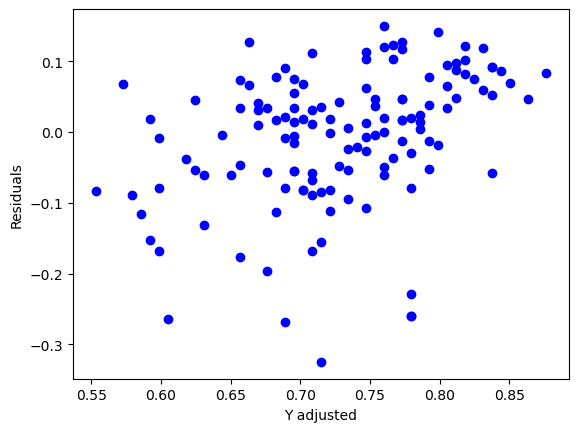

ShapiroResult(statistic=0.9397594928741455, pvalue=1.7432745153200813e-05)

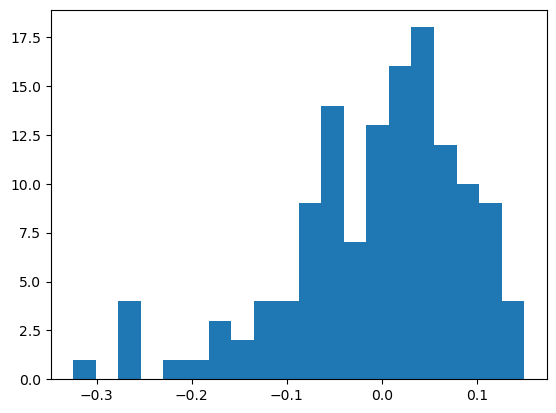

In [9]:
# Régression linaire ElasticNet avec penalisation l1 et l2
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train_split, Y_train_split)
print("coefficients:", regr.coef_)
print("intercept:", regr.intercept_)

#Afficher la valeur de R2 calulé sur l'ensemble de validation
print(regr.get_params(deep=True))
print("R2:", regr.score(X_val, Y_val))
Y_hat=regr.predict(X_val)
#print(Y_hat)

#Calculer la MAE sur sur l'ensemble de validation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_val, Y_hat)
print('Mean Absolute Error:', round(mae, 3))

# On regarde si les hypothèses de régression linéaire sont vérifiées (homosedasticité et normalité des résidus 
# par représentation graphique, et normalité des résidus par test de Shapiro)
fig=plt.plot(Y_hat, (Y_val-Y_hat), "ob")
plt.xlabel('Y adjusted')
plt.ylabel('Residuals')
plt.show()
plt.hist(Y_val-Y_hat, bins=20)

import numpy as np
from scipy import stats
shapiro_test = stats.shapiro(Y_val-Y_hat)
shapiro_test

alpha: 0.002808234573401648
l1_ratio 0.5
intercept: -1.39302622720056
coeff: [0.00247755 0.00259115 0.00268322 0.00137356 0.01916244 0.11246678
 0.01273363]
R2: 0.7569074724281852
Mean Absolute Error: 0.047


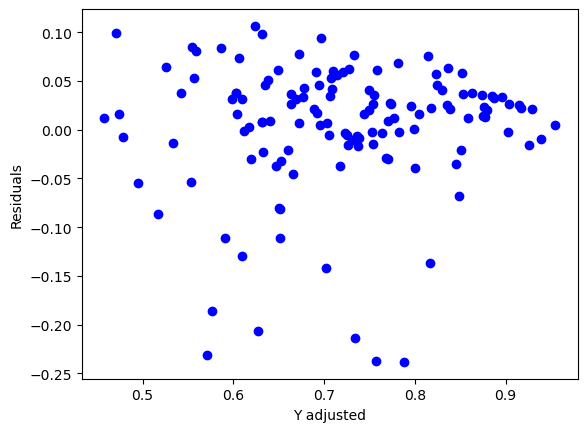

ShapiroResult(statistic=0.8333396315574646, pvalue=6.354775039518756e-11)

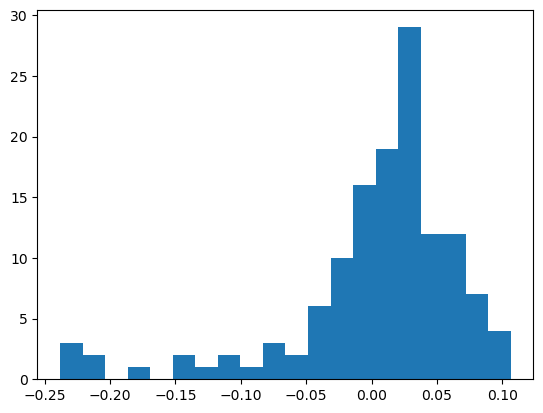

In [10]:
#Optimisation des hyperparamètres du modèle ElasticNet par cross validation
from sklearn.linear_model import ElasticNetCV

regr_2=ElasticNetCV(cv=5, random_state=None)
regr_2.fit(X_train_split, Y_train_split)   
print("alpha:", regr_2.alpha_)
print("l1_ratio", regr_2.l1_ratio_)
print("intercept:", regr_2.intercept_)
print("coeff:", regr_2.coef_)


#Afficher R2 sur calculé sur l'ensemble de validation
print("R2:", regr_2.score(X_val, Y_val))
Y_hat2=regr_2.predict(X_val)
#print(Y_hat2)

#Calculer la MAE sur sur l'ensemble de validation
mae_2 = mean_absolute_error(Y_val, Y_hat2)
print('Mean Absolute Error:', round(mae_2, 3))


# On regarde si les hypothèses de régression linéaire sont vérifiées (homosedasticité et normalité des résidus 
# par représentation graphique, et normalité des résidus par test de Shapiro)
fig=plt.plot(Y_hat2, (Y_val-Y_hat2), "ob")
plt.xlabel('Y adjusted')
plt.ylabel('Residuals')
plt.show()
plt.hist(Y_val-Y_hat2, bins=20)

shapiro_test = stats.shapiro(Y_val-Y_hat2)
shapiro_test

## Régression Random Forest (non linéaire)

In [11]:
#test de RF regressor
from sklearn.ensemble import RandomForestRegressor
regrrf = RandomForestRegressor(max_depth=100, random_state=0)
regrrf.fit(X_train_split, Y_train_split)

#Afficher R2 calulé sur l'ensemble de validation
print("R2", regrrf.score(X_val, Y_val))
Y_hatrf=regrrf.predict(X_val)
#print(Y_hatrf)

#Calculer la MAE sur sur l'ensemble de validation
mae_rf = mean_absolute_error(Y_val, Y_hatrf)
print('Mean Absolute Error:', round(mae_rf, 3))

R2 0.6964660673240395
Mean Absolute Error: 0.052


In [14]:
#Optimisation des hyperparamètres du RF regressor par cross-validation
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint 

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_split, Y_train_split)



{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [15]:
dico=rf_random.best_params_
print(dico.values())

dict_values([200, 2, 1, 'sqrt', 50, True])


In [16]:
#RF regressor avec hyperparamètres optimaux
rf_new=RandomForestRegressor(n_estimators=dico.get('n_estimators'), min_samples_split=dico.get('min_samples_split'), min_samples_leaf=dico.get('min_samples_leaf'), max_features=dico.get('max_features'), max_depth=dico.get('max_depth'), bootstrap=dico.get('bootstrap'))
rf_new.fit(X_train_split, Y_train_split)
#Afficher R2 calulé sur l'ensemble de validation
print("R2", rf_new.score(X_val, Y_val))
Y_hatrf_new=rf_new.predict(X_val)
#print(Y_hatrf_new)

#Calculer la MAE sur sur l'ensemble de validation
mae_rf_new = mean_absolute_error(Y_val, Y_hatrf_new)
print('Mean Absolute Error:', round(mae_rf_new, 3))

R2 0.749531510710642
Mean Absolute Error: 0.047


# Tester un réseau de neurones pour la régression

In [12]:
#On divise l'ensemble de validation en 2 pour avoir un ensemble de training (X_train_split, Y_train_split déjà existant), ainsi 
# qu'un ensmble de validation (pour observer l'évolution de la loss et comment se passe l'apprentissage), puis un ensemble de test 
# pour évaluer la performance du modèle final
X_valnew, X_test, Y_valnew, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=0)
print("taille des sets", X_valnew.shape, X_test.shape, Y_valnew.shape, Y_test.shape)

taille des sets (66, 7) (66, 7) (66,) (66,)


In [13]:
import torch
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import time
import os
from tensorboard import notebook
%reload_ext tensorboard
%tensorboard --logdir /tmp/logs/module3

notebook.display()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

def save_state(epoch,model,optim,fichier):
    state = {'epoch' : epoch, 'model_state': model.state_dict(), 'optim_state': optim.state_dict()}
    torch.save(state,fichier)


def load_state(fichier,model,optim):
    epoch = 0
    if os.path.isfile(fichier):
        state = torch.load(fichier)
        model.load_state_dict(state['model_state'])
        optim.load_state_dict(state['optim_state'])
        epoch = state['epoch']
    else:
        print(f"{fichier} does not exist, starting from epoch 0")
    return epoch

X_tr = torch.tensor(X_train_split.values, dtype=torch.float)
num_features=X_tr.shape[1]
print(num_features)
Y_tr = torch.tensor(Y_train_split.values, dtype=torch.float)
X_v=torch.tensor(X_valnew.values, dtype=torch.float)
Y_v=torch.tensor(Y_valnew.values, dtype=torch.float)

# Datasets

train_dataset = TensorDataset(X_tr, Y_tr)
val_dataset = TensorDataset(X_v, Y_v)

EPOCHS = 1000
BATCH_SIZE = 10

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    


net = torch.nn.Sequential(torch.nn.Linear(X_tr.size(1),5),torch.nn.Tanh(),torch.nn.Linear(5,1))
net.name = "mon_premier_reseau"
CHECK_FILE = "/tmp/mon_premier_reseau.chk"
net = net.to(device)
MyLoss = torch.nn.MSELoss()
optim = torch.optim.SGD(params=net.parameters(),lr=1e-5)

start_epoch = load_state(CHECK_FILE,net,optim)


# On créé un writer avec la date du modèle pour s'y retrouver
summary = SummaryWriter(f"/tmp/logs/module3/model--{time.time_ns()}")
for epoch in range(EPOCHS):
    # Apprentissage
    net.train()
    cumloss = 0
    for xbatch, ybatch in train_loader:
        xbatch, ybatch = xbatch.to(device), ybatch.to(device)
        outputs = net(xbatch)
        loss = MyLoss(outputs.view(-1),ybatch)
        optim.zero_grad()
        loss.backward()
        optim.step()
        cumloss += loss.item()
    summary.add_scalar("loss/train loss",  cumloss/len(train_loader),epoch)
     
    if epoch % 10 == 0: 
        save_state(epoch,net,optim,CHECK_FILE)
        # Validation
        net.eval()
        with torch.no_grad():
            cumloss = 0
            for xbatch, ybatch in valid_loader:
                xbatch, ybatch = xbatch.to(device), ybatch.to(device)
                outputs = net(xbatch)
            cumloss += MyLoss(outputs.view(-1),ybatch).item()
        summary.add_scalar("loss/validation loss", cumloss/len(valid_loader) ,epoch)
        
        



Reusing TensorBoard on port 6006 (pid 42904), started 1:18:27 ago. (Use '!kill 42904' to kill it.)

Selecting TensorBoard with logdir /tmp/logs/module3 (started 0:09:29 ago; port 6006, pid 11472).


7
